In [1]:
import pandas as pd
import numpy as np

In [2]:
agri_df = pd.read_csv('crop_production.csv')

In [3]:
agri_df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [4]:
agri_df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [5]:
agri_df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [6]:
agri_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [7]:
agri_df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [8]:
season = agri_df['Season'].unique()
season

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [9]:
districts = agri_df['District_Name'].unique()
len(districts)

646

In [10]:
years = agri_df['Crop_Year'].unique()
years

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [11]:
states = agri_df['State_Name'].unique()
print(states)

print('''
============================================================================================
''')

print("Numbers of states for which dataset is availabe are: ", len(states))

['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']


Numbers of states for which dataset is availabe are:  33


In [12]:
crop = agri_df['Crop'].unique()
season = agri_df['Season'].unique()

print(crop)
print(len(crop))

['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soyabean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Rapeseed &Mustard' 'Mesta' 'Cowpea(Lobia)' 'Lemon'
 'Pome Granet' 'Sapota' 'Cabbage' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Sannhamp' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total'
 'Pulses total' 'Jute' 'Peas & beans (Pulses)' 'Blackgram' 'Paddy'
 'Pineapple' 'Barley' 'Khesari' 'Guar seed' 'Moth'


In [13]:
season

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

Dropping rows with null production data.

In [14]:
df_copy = agri_df.dropna()

In [15]:
df_copy.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [16]:
df_copy.shape

(242361, 7)

# Exploratory Analysis and Visualization

In [17]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

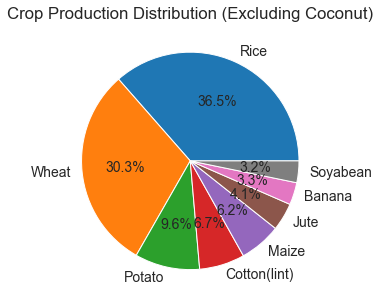

In [18]:
new_df =  df_copy.groupby('Crop')['Production'].sum().reset_index()
sorted_prod = new_df.sort_values(by='Production', ascending=False)
sorted_prod

plot_pie = sorted_prod[2:10]
# plot_pie

crop_names = plot_pie['Crop']
production_values = plot_pie['Production']

plt.pie(production_values, labels=crop_names, autopct='%1.1f%%')

plt.title('Crop Production Distribution (Excluding Coconut)')

plt.show()

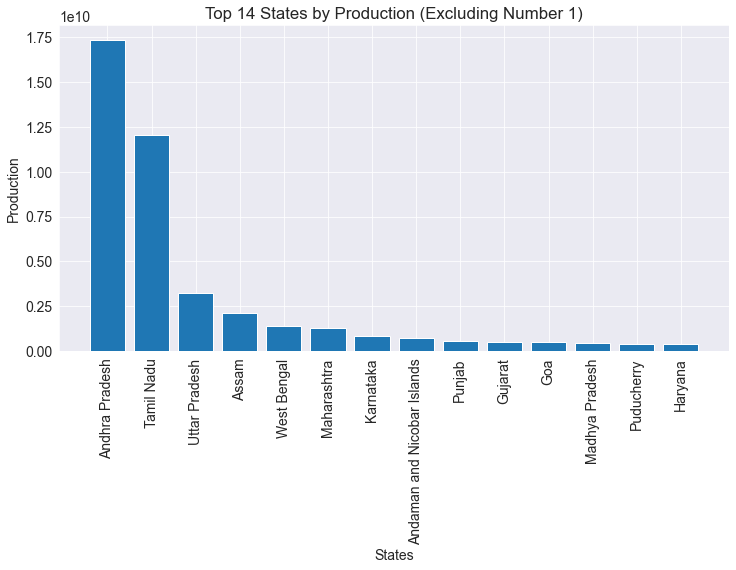

In [19]:
state_production = df_copy.groupby('State_Name')['Production'].sum()

sorted_states_desc = state_production.sort_values(ascending=False)

top_15_states_desc = sorted_states_desc.head(15)

top_14_states_desc = top_15_states_desc[1:]

plt.figure(figsize=(12, 6))
plt.bar(top_14_states_desc.index, top_14_states_desc.values)
plt.xlabel('States')
plt.ylabel('Production')
plt.title('Top 14 States by Production (Excluding Number 1)')
plt.xticks(rotation=90)
plt.show()

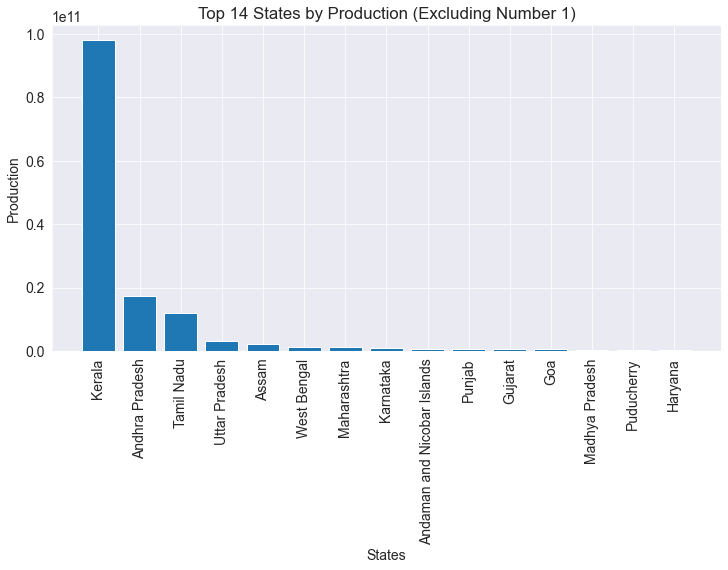

In [20]:
state_production = df_copy.groupby('State_Name')['Production'].sum()

sorted_states_desc = state_production.sort_values(ascending=False)

top_15_states_desc = sorted_states_desc.head(15)

top_14_states_desc = top_15_states_desc[0:]

plt.figure(figsize=(12, 6))
plt.bar(top_14_states_desc.index, top_14_states_desc.values)
plt.xlabel('States')
plt.ylabel('Production')
plt.title('Top 14 States by Production (Excluding Number 1)')
plt.xticks(rotation=90)
plt.show()

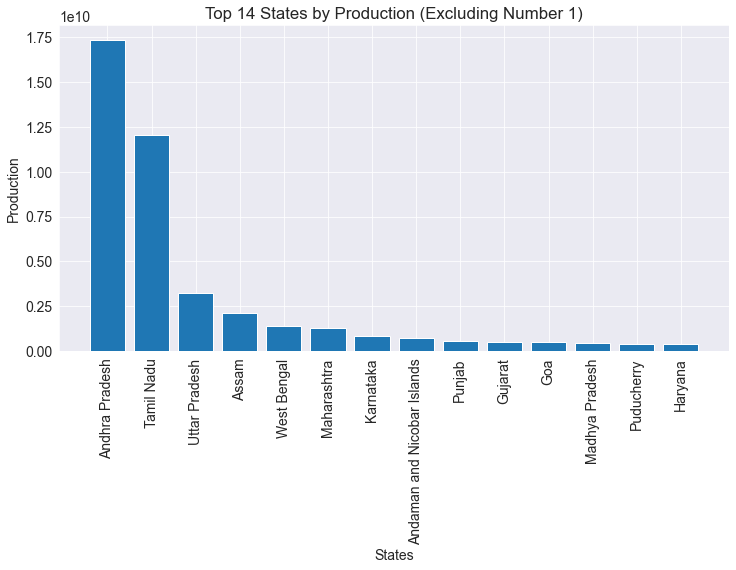

In [21]:
state_production = df_copy.groupby('State_Name')['Production'].sum()

sorted_states_desc = state_production.sort_values(ascending=False)

top_15_states_desc = sorted_states_desc.head(15)

top_14_states_desc = top_15_states_desc[1:]

plt.figure(figsize=(12, 6))
plt.bar(top_14_states_desc.index, top_14_states_desc.values)
plt.xlabel('States')
plt.ylabel('Production')
plt.title('Top 14 States by Production (Excluding Number 1)')
plt.xticks(rotation=90)
plt.show()

In [22]:
top_crops = df_copy.groupby('Crop')['Production'].sum().reset_index()
top_crops_sorted = top_crops.sort_values(by='Production', ascending=False)
top_10_crops = top_crops_sorted[1:11]
top_10_crops

,Crop,Production
106,Sugarcane,5.535682e+09
95,Rice,1.605470e+09
119,Wheat,1.332826e+09
87,Potato,4.248263e+08
33,Cotton(lint),2.970000e+08
59,Maize,2.733418e+08
49,Jute,1.815582e+08
7,Banana,1.461327e+08
105,Soyabean,1.418372e+08
6,Bajra,1.296810e+08


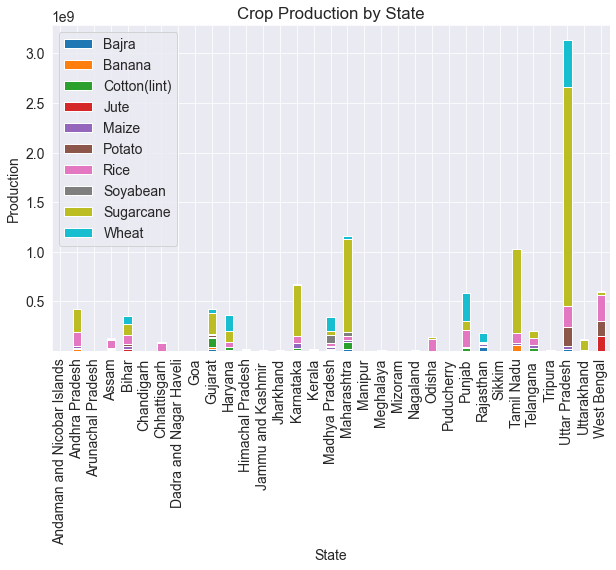

In [23]:
grouped_df = df_copy.groupby(['State_Name', 'Crop'])['Production'].sum().reset_index()

top_10_crops = grouped_df[grouped_df['Crop'].isin(top_10_crops['Crop'])]

pivot_df = top_10_crops.pivot(index='State_Name', columns='Crop', values='Production')

pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('State')
plt.ylabel('Production')
plt.title('Crop Production by State')

plt.legend()
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1997'),
  Text(1, 0, '1998'),
  Text(2, 0, '1999'),
  Text(3, 0, '2000'),
  Text(4, 0, '2001'),
  Text(5, 0, '2002'),
  Text(6, 0, '2003'),
  Text(7, 0, '2004'),
  Text(8, 0, '2005'),
  Text(9, 0, '2006'),
  Text(10, 0, '2007'),
  Text(11, 0, '2008'),
  Text(12, 0, '2009'),
  Text(13, 0, '2010'),
  Text(14, 0, '2011'),
  Text(15, 0, '2012'),
  Text(16, 0, '2013'),
  Text(17, 0, '2014'),
  Text(18, 0, '2015')])

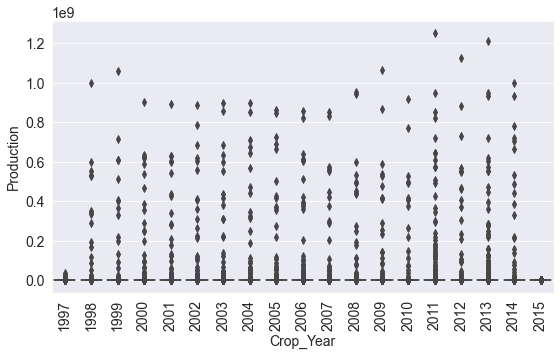

In [24]:
sns.boxplot(x=df_copy["Crop_Year"],y=df_copy["Production"])
plt.xticks(rotation=90)

# Prominent crops in Andhra Pradesh

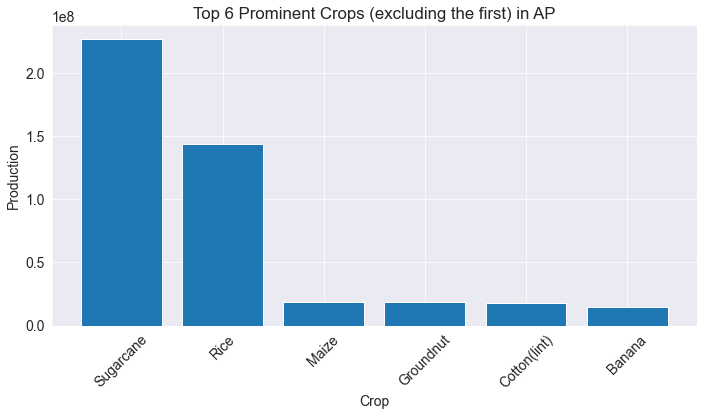

In [25]:
df1 = df_copy
kerala_data = df1[df1['State_Name'] == 'Andhra Pradesh']

crop_production = kerala_data.groupby('Crop')['Production'].sum().reset_index()

prominent_crops = crop_production.sort_values('Production', ascending=False)

top_6_crops = prominent_crops.iloc[1:7]

plt.figure(figsize=(10, 6))
plt.bar(top_6_crops['Crop'], top_6_crops['Production'])
plt.xlabel('Crop')
plt.ylabel('Production')
plt.title('Top 6 Prominent Crops (excluding the first) in AP')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 

    1.Sugarcane and rice are the prominent crops in Andhra Pradesh.
    2.Sugarcane has a high production quantity.
    3.Rice production quantity is comparable to sugarcane.
    4.Maize, groundnut, cotton (lint), and banana have relatively low production quantities.
    5.The production quantities of maize, groundnut, cotton (lint), and banana are much less compared to sugarcane and rice.



# Prominent crops in Kerala

In [26]:
df = pd.read_csv('crop_production.csv')

kerala_data = df[df['State_Name'] == 'Kerala']

crop_production = kerala_data.groupby('Crop')['Production'].sum().reset_index()

prominent_crops = crop_production.sort_values('Production', ascending=False)

print("Top 5 Prominent Crops in Kerala:")
print(prominent_crops.head(5))

Top 5 Prominent Crops in Kerala:
         Crop    Production
11   Coconut   9.780304e+10
43    Tapioca  4.611366e+07
35       Rice  1.059335e+07
2      Banana  7.655662e+06
41  Sugarcane  3.819916e+06


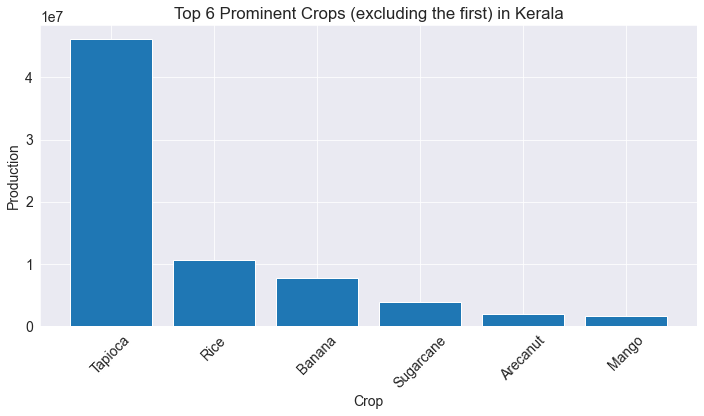

In [27]:
df = pd.read_csv('crop_production.csv')

kerala_data = df[df['State_Name'] == 'Kerala']

crop_production = kerala_data.groupby('Crop')['Production'].sum().reset_index()

prominent_crops = crop_production.sort_values('Production', ascending=False)

top_6_crops = prominent_crops.iloc[1:7]

plt.figure(figsize=(10, 6))
plt.bar(top_6_crops['Crop'], top_6_crops['Production'])
plt.xlabel('Crop')
plt.ylabel('Production')
plt.title('Top 6 Prominent Crops (excluding the first) in Kerala')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

    1.The dominance of coconut production in Kerala showcases its significance in terms of both economic value and agricultural practices.
    2.Tapioca, rice, banana, and sugarcane follow coconut in terms of prominence, representing a diverse agricultural landscape in Kerala.
    3.The production quantities of tapioca, rice, banana, and sugarcane are significantly lower compared to coconut, indicating the dominance of coconut farming in terms of production scale.


In [28]:
state_production['Kerala']/state_production['Andhra Pradesh']

5.649775475400368

in the similar way, data for each state can be analysed and matched with our final prediction modal which predicts crop upon certain features